<a href="https://colab.research.google.com/github/pematenzi/redi/blob/main/Movie_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





What makes a movie successful?


# 1 - Business issue:
We are about to start a new movie project, but before investing any money we want to know which are the factors that make a movie successful.

# 2 - Data Understanding and 3 Data Preparation

Import libraries and read Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("/content/movies.csv")

In [ ]:
df.head(2) #head is a function that allows us to check the top rows of a dataset, it works great to have a fast idea of how the dataset works.
# We could also use df.sample(2) to check 2 random rows of the dataset.

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [ ]:
df.info() #.info is also a great function to start exploring the dataset, it tells us the ammount of non-null rows (important for missing data) and the data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [ ]:
#Drop the rows with less null values
columns_with_na = ['released', 'score', 'votes',
                   'writer', 'star', 'country',
                   'runtime','gross','budget']
df = df.dropna(axis=0, subset = columns_with_na)

#change datatype of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

# we will understant those lines better in the future, but we are right now just making sure we work with just the columns that do not have missing data.
# and then we make some data type transformations.

<ipython-input-21-aca16bcf4916>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'] = df['budget'].astype('int64')
<ipython-input-21-aca16bcf4916>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross'] = df['gross'].astype('int64')
<ipython-input-21-aca16bcf4916>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [ ]:
# correcting the year
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


# 4 - Exploration

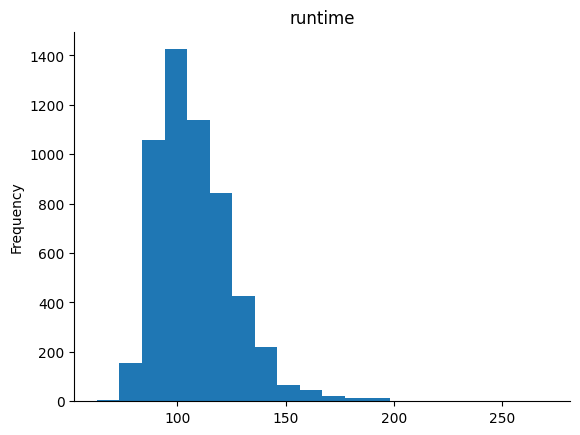

In [ ]:
# @title Duration

from matplotlib import pyplot as plt
df['runtime'].plot(kind='hist', bins=20, title='runtime')
plt.gca().spines[['top', 'right',]].set_visible(False)

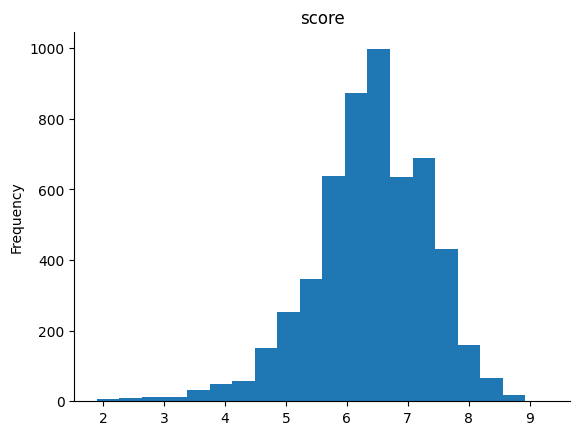

In [ ]:
# @title Movie Rating

from matplotlib import pyplot as plt
df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

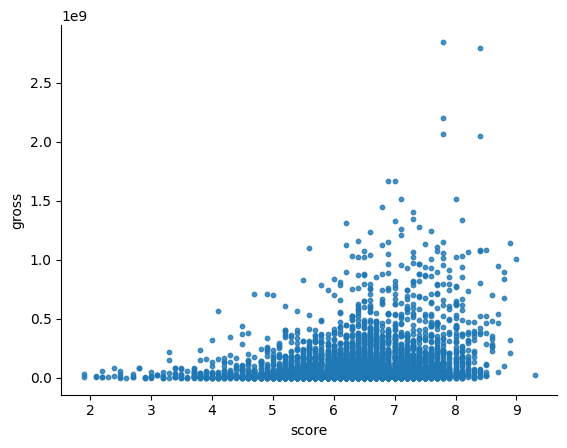

In [ ]:
# @title Movie Rating vs Duration

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='score', y='gross', s=10, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Lets start look at the correlation



In [ ]:
df.corr(numeric_only=True, method = 'pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.055561,0.206096,0.328138,0.274597,0.074763,0.998640
score,0.055561,1.000000,0.473759,0.071751,0.222059,0.414540,0.061413
votes,0.206096,0.473759,1.000000,0.439986,0.614871,0.352351,0.203216
budget,0.328138,0.071751,0.439986,1.000000,0.740393,0.318446,0.320594
gross,0.274597,0.222059,0.614871,0.740393,1.000000,0.275505,0.268952
runtime,0.074763,0.414540,0.352351,0.318446,0.275505,1.000000,0.074986
yearcorrect,0.998640,0.061413,0.203216,0.320594,0.268952,0.074986,1.000000


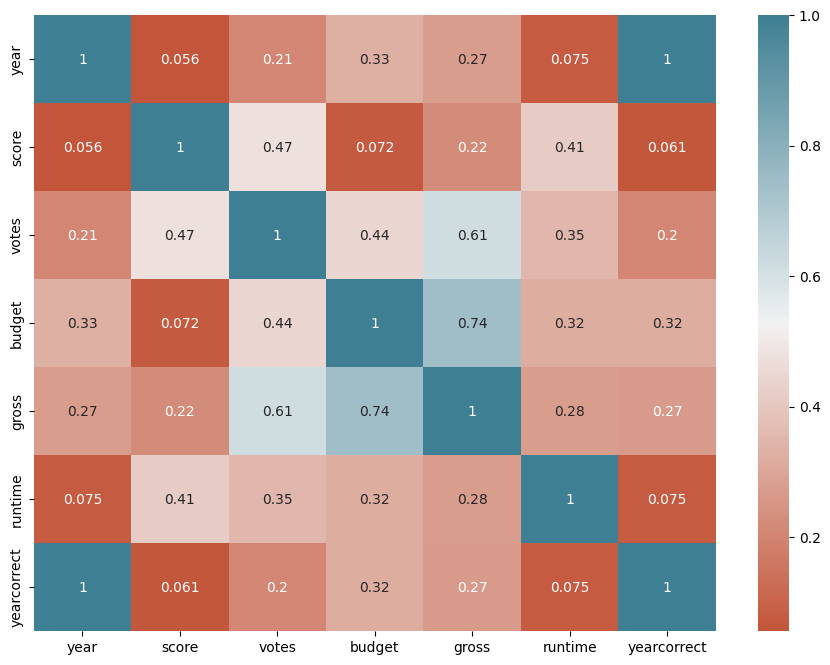

In [ ]:
correlation = df.corr(numeric_only=True, method = 'pearson')
palette = sns.diverging_palette(20, 220, n=256)
plt.figure(figsize=(11,8))
sns.heatmap( correlation,cmap =palette,annot=True)
plt.show()

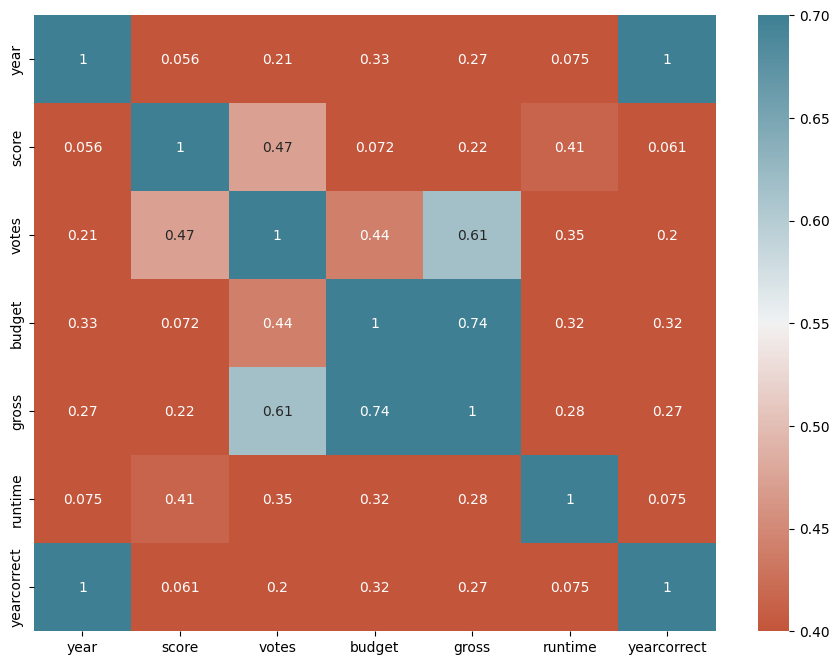

In [ ]:
correlation = df.corr(numeric_only=True, method = 'pearson')
palette = sns.diverging_palette(20, 220, n=256)
plt.figure(figsize=(11,8))
sns.heatmap( correlation,cmap = palette,vmin = 0.4, vmax = 0.7, annot=True)
plt.show()

Text(0.5, 1.0, 'Scatter Plot with Regression Line: Budget vs. Gross Earnings')

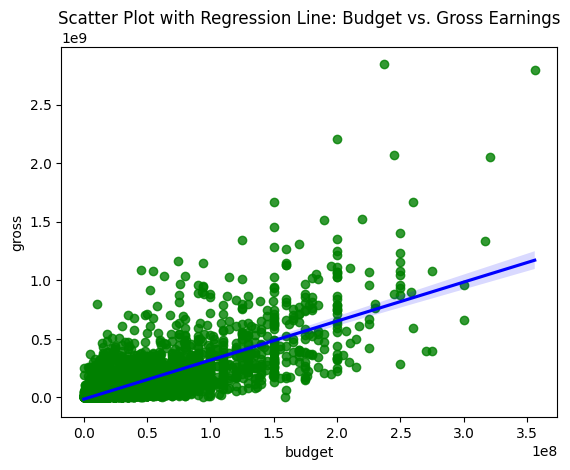

In [ ]:
# plot budget vs gross using seaborn
sns.regplot(x = 'budget',
            y = 'gross',
            data= df ,
            scatter_kws = {'color': 'green'},
            line_kws = {'color': 'blue'})

plt.title('Scatter Plot with Regression Line: Budget vs. Gross Earnings')

Text(0.5, 1.0, 'Scatter Plot with Regression Line: Budget vs. Gross Earnings')

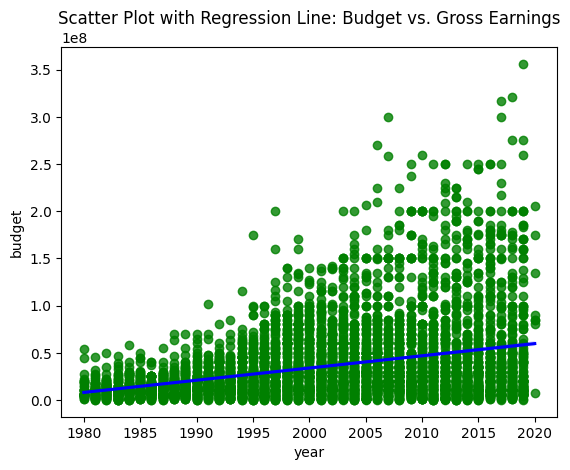

In [ ]:
# plot budget vs gross using seaborn
sns.regplot(x = 'year',
            y = 'budget',
            data= df ,
            scatter_kws = {'color': 'green'},
            line_kws = {'color': 'blue'})

plt.title('Scatter Plot with Regression Line: Budget vs. Gross Earnings')

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [ ]:
director_stats = df.groupby('director').agg(
    Avg_Score=('score', 'mean'),
    Avg_Gross=('gross', 'mean'),
    Movies_Count=('name', 'count')
)

# Filter directors with more than 10 movies
directors_filtered = director_stats[director_stats['Movies_Count'] > 5].sort_values(by='Avg_Score', ascending=False)

print(directors_filtered.head(10))

                   Avg_Score     Avg_Gross  Movies_Count
director                                                
Christopher Nolan   8.163636  4.685044e+08            11
Quentin Tarantino   8.100000  2.077910e+08             9
Hayao Miyazaki      8.100000  1.620562e+08             6
James Cameron       7.871429  8.925841e+08             7
David Fincher       7.760000  2.142318e+08            10
Peter Jackson       7.745455  6.016405e+08            11
Martin Scorsese     7.673684  1.102185e+08            19
Alfonso Cuarón      7.600000  2.817127e+08             6
Wes Anderson        7.575000  5.587553e+07             8
Brad Bird           7.566667  5.711503e+08             6


In [ ]:
directors_filtered = director_stats[director_stats['Movies_Count'] > 5].sort_values(by='Avg_Gross', ascending=False)

print(directors_filtered.head(10))

                   Avg_Score     Avg_Gross  Movies_Count
director                                                
James Cameron       7.871429  8.925841e+08             7
David Yates         7.200000  8.407581e+08             6
J.J. Abrams         7.300000  7.765626e+08             6
Peter Jackson       7.745455  6.016405e+08            11
Brad Bird           7.566667  5.711503e+08             6
Michael Bay         6.484615  4.962841e+08            13
Jon Favreau         6.900000  4.849640e+08             9
Francis Lawrence    6.914286  4.805250e+08             7
Christopher Nolan   8.163636  4.685044e+08            11
James Wan           6.966667  4.122946e+08             9


In [ ]:
actors_stats = df.groupby('star').agg(
    Avg_Score=('score', 'mean'),
    Avg_Gross=('gross', 'mean'),
    Movies_Count=('name', 'count')
)

# Filter directors with more than 10 movies
actors_filtered = actors_stats[actors_stats['Movies_Count'] > 5].sort_values(by='Avg_Score', ascending=False)

print(directors_filtered.head(10))

                   Avg_Score     Avg_Gross  Movies_Count
director                                                
James Cameron       7.871429  8.925841e+08             7
David Yates         7.200000  8.407581e+08             6
J.J. Abrams         7.300000  7.765626e+08             6
Peter Jackson       7.745455  6.016405e+08            11
Brad Bird           7.566667  5.711503e+08             6
Michael Bay         6.484615  4.962841e+08            13
Jon Favreau         6.900000  4.849640e+08             9
Francis Lawrence    6.914286  4.805250e+08             7
Christopher Nolan   8.163636  4.685044e+08            11
James Wan           6.966667  4.122946e+08             9


In [ ]:

# Filter directors with more than 10 movies
actors_filtered = actors_stats[actors_stats['Movies_Count'] > 5].sort_values(by='Avg_Gross', ascending=False)

print(actors_filtered.head(10))

                   Avg_Score     Avg_Gross  Movies_Count
star                                                    
Chris Pratt         7.183333  8.797427e+08             6
Daniel Radcliffe    7.300000  6.971268e+08            10
Robert Downey Jr.   7.057895  6.239967e+08            19
Daniel Craig        7.111111  4.450623e+08             9
Kristen Bell        6.328571  4.208384e+08             7
Kristen Stewart     5.466667  4.201075e+08             9
Vin Diesel          6.393333  4.024208e+08            15
Jennifer Lawrence   6.750000  3.631559e+08            10
Elijah Wood         7.000000  3.620697e+08            10
Tobey Maguire       7.087500  3.502357e+08             8
